In [2]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import matplotlib

In [3]:
data = pd.read_csv('E:/jupyter/机器学习项目/红酒质量-svm/winequality-red.csv')

In [4]:
X = data.drop('quality', axis=1)  
Y = data['quality']  

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
svc = SVC(probability=True)  
svc.fit(X_train, Y_train)

SVC(probability=True)

In [12]:
X_train_prediction = svc.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction,Y_train)
f1_train =f1_score(X_train_prediction,Y_train,average='weighted')
print(train_data_accuracy)
print(f1_train)

0.5129007036747459
0.561330048760688


In [14]:
X_test_prediction = svc.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)
f1_test =f1_score(X_test_prediction,Y_test,average='weighted')
print(test_data_accuracy)
print(f1_test)

0.509375
0.5569497843210802


In [16]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号 '-' 显示为方块的问题plt.figure(figsize=(10, 7))

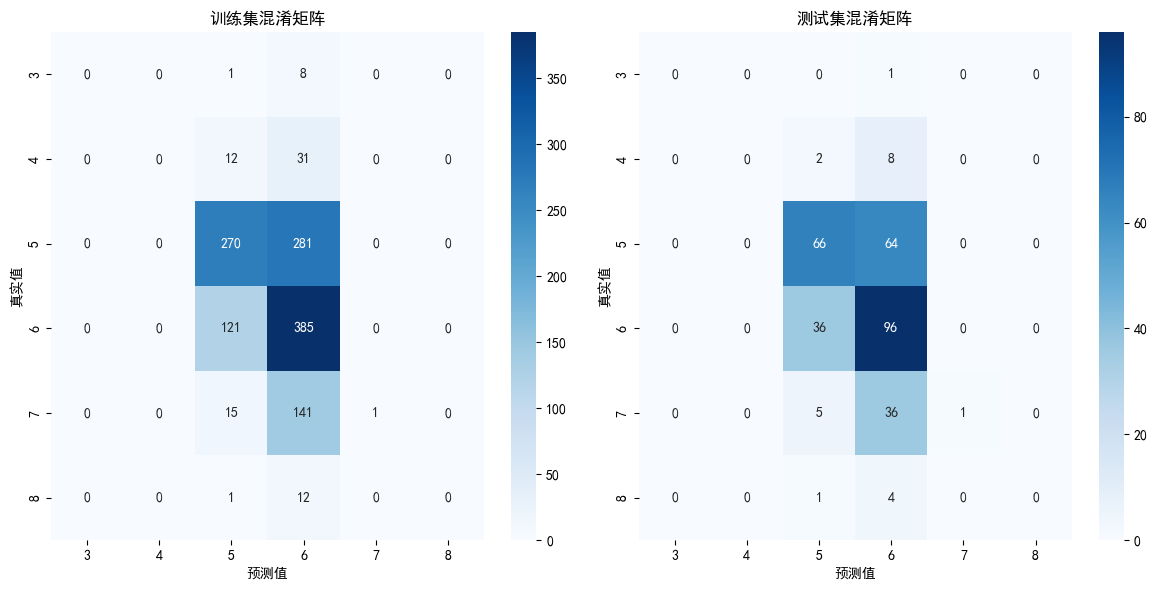

In [18]:
conf_matrix = confusion_matrix(Y_train, X_train_prediction)
conf_matrix_test = confusion_matrix(Y_test, X_test_prediction)

# 设置图形大小
fig_size = (12, 6)  # 12 英寸宽, 6 英寸高
fig, ax = plt.subplots(1, 2, figsize=fig_size)

# 绘制训练集的混淆矩阵
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[3, 4, 5, 6, 7, 8],  # 根据你的分类标签修改
            yticklabels=[3, 4, 5, 6, 7, 8], ax=ax[0])  # 使用ax[0]指定在哪个子图上绘制
ax[0].set_ylabel('真实值')
ax[0].set_xlabel('预测值')
ax[0].set_title('训练集混淆矩阵')

# 绘制测试集的混淆矩阵
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[3, 4, 5, 6, 7, 8],  # 根据你的分类标签修改
            yticklabels=[3, 4, 5, 6, 7, 8], ax=ax[1])  # 使用ax[1]指定在哪个子图上绘制
ax[1].set_ylabel('真实值')
ax[1].set_xlabel('预测值')
ax[1].set_title('测试集混淆矩阵')

# 自动调整布局
plt.tight_layout()
plt.savefig("支持向量分类-红酒-默认.png", dpi=300, bbox_inches='tight') 
# 显示图形
plt.show()

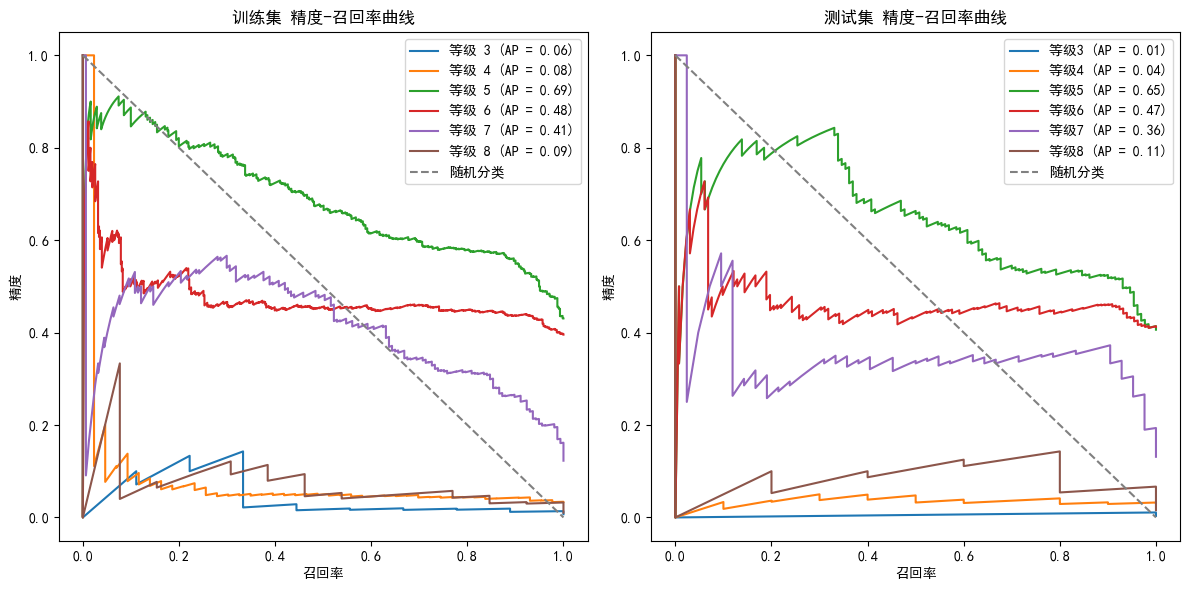

In [20]:
Y_train_probs = svc.predict_proba(X_train)
unique_classes_train = np.unique(Y_train)

# 获取测试集的预测概率
Y_test_probs = svc.predict_proba(X_test)
unique_classes_test = np.unique(Y_test)

# 设置图形大小和子图的排列 (1 行 2 列)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 绘制训练集的精度-召回率曲线
for i in unique_classes_train:
    precision, recall, _ = precision_recall_curve(Y_train == i, Y_train_probs[:, i-3])
    ax[0].plot(recall, precision, label=f'等级 {i} (AP = {average_precision_score(Y_train == i, Y_train_probs[:, i-3]):.2f})')

# 绘制测试集的精度-召回率曲线
for i in unique_classes_test:
    precision, recall, _ = precision_recall_curve(Y_test == i, Y_test_probs[:, i-3])
    ax[1].plot(recall, precision, label=f'等级{i} (AP = {average_precision_score(Y_test == i, Y_test_probs[:, i-3]):.2f})')

# 在两个子图中分别绘制随机分类器的对角线
ax[0].plot([0, 1], [1, 0], linestyle='--', color='gray', label='随机分类')
ax[1].plot([0, 1], [1, 0], linestyle='--', color='gray', label='随机分类')

# 设置标题、标签和图例
ax[0].set_title('训练集 精度-召回率曲线')
ax[0].set_xlabel('召回率')
ax[0].set_ylabel('精度')
ax[0].legend(loc='best')

ax[1].set_title('测试集 精度-召回率曲线')
ax[1].set_xlabel('召回率')
ax[1].set_ylabel('精度')
ax[1].legend(loc='best')
plt.savefig("支持向量分类-精度召回率-默认.png", dpi=300, bbox_inches='tight') 
# 自动调整布局
plt.tight_layout()

# 显示图形
plt.show()